# 必要なライブラリをimport

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [2]:
sample_size = (12, 8, 10)
lambda_param = 200
color_list = ['blue', 'red', 'green', 'yellow']

well_size = 0.8

## 実際のデータを使う用

In [3]:
mode = 'real data'
c_prime_x = [(2, 0), (5, 1)]
c_prime_y = [(1, 0), (2, 1)]
c_prime_z = [(0, 1), (2, 0)]

# c_prime_x = [(1, 0)]
# c_prime_y = [(1, 0)]
# c_prime_z = [(0, 0)]

candidates = list(itertools.product(c_prime_x, c_prime_y, c_prime_z))

re_test = [candidate for candidate in candidates if candidate[0][1] == candidate[1][1] == candidate[2][1]]
re_test_dict = {re_test_y[0]+re_test_x[0]*sample_size[1]+sample_size[0]*sample_size[1]*re_test_z[0]: re_test_x[1] for re_test_x, re_test_y, re_test_z in re_test}
re_test_index = re_test_dict.keys()

In [4]:
re_test_dict

{209: 0, 42: 1}

## シミュレーション用(Ramdom)

In [5]:
arr = np.random.exponential(scale=1/lambda_param, size=(12, 8, 10))
color_arr = np.zeros(sample_size)

query = np.random.randint(0, 4, (sample_size[0]*sample_size[2]))
for i in range(sample_size[0]):
    for k in range(sample_size[2]):
        color_arr[i, :, k] = query[i + k * sample_size[2]]

rand = np.random.rand(12, 8, 10)
samples = rand < arr

# positiveの(x, y, z)を取得
indices = np.nonzero(samples)
positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

c_x = np.where(np.any(samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(samples, axis = (0, 1)))[0].tolist()

re_test = list(itertools.product(c_x, c_y, c_z))
re_test_dict = {j + i*sample_size[1] + sample_size[0]*sample_size[1]*k: query[i + k * sample_size[2]] for i, j, k in re_test}
re_test_index = re_test_dict.keys()

c_x_prime, c_y_prime, c_z_prime = [], [], []
for i in range(len(c_y)):
    print(np.unique(color_arr[:, i, :]))

[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]


In [6]:
c_y

[0, 1, 4, 7]

In [7]:
np.unique(color_arr[1, 2, :])

array([0., 1., 2., 3.])

## 再検査が必要なsample数

In [8]:
f'{len(re_test)}→'

'120→'

# 可視化

## positiveなsampleの位置を可視化

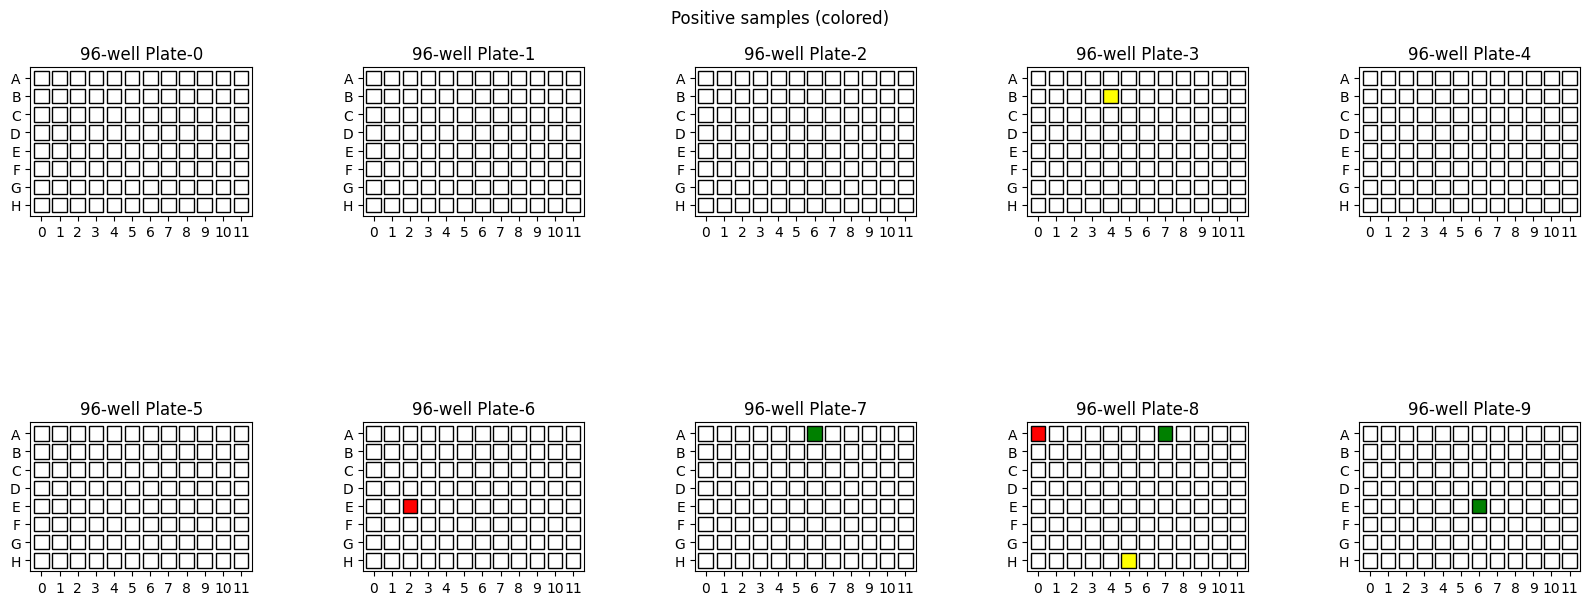

In [9]:
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if (i, j, well_number) in positives:
                color = color_list[query[i + k * sample_size[2]]]
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)
    
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number}')

fig.suptitle('Positive samples (colored)', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

## 再検査が必要な well を可視化

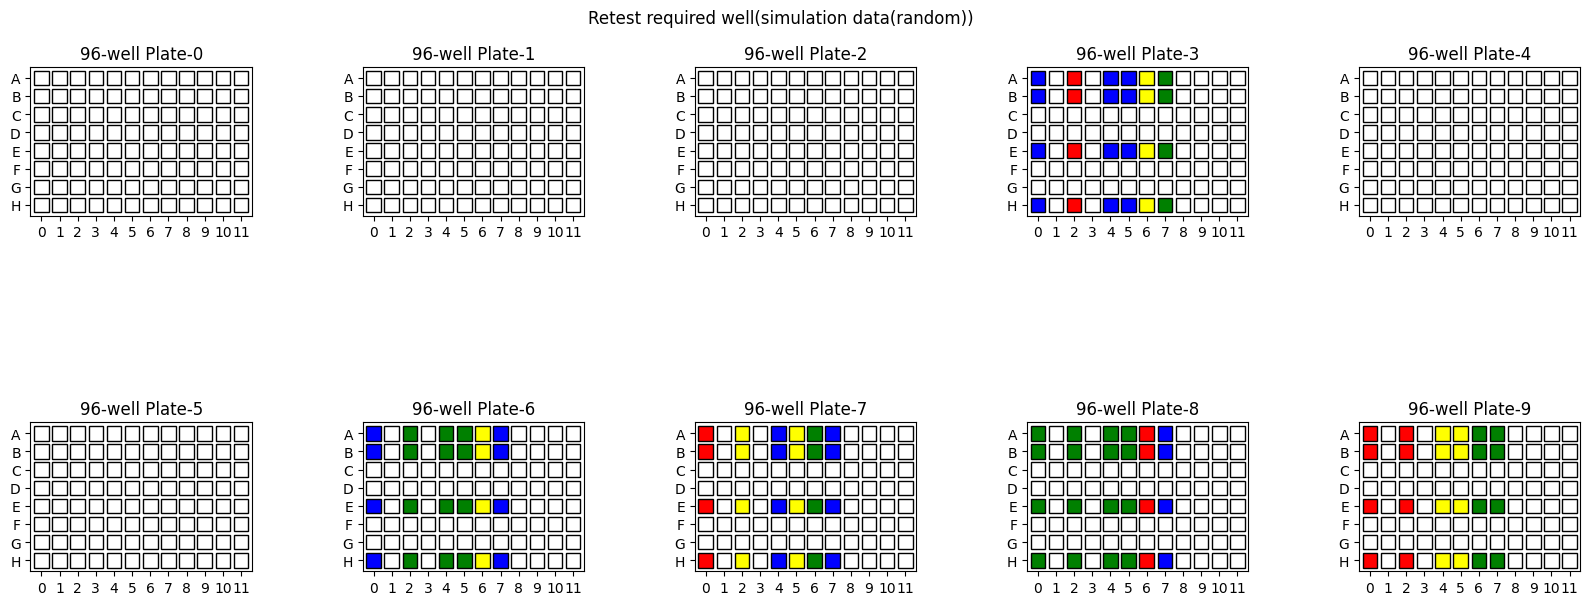

In [10]:
mode = 'simulation data(random)'
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = color_list[re_test_dict[cnt]]
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

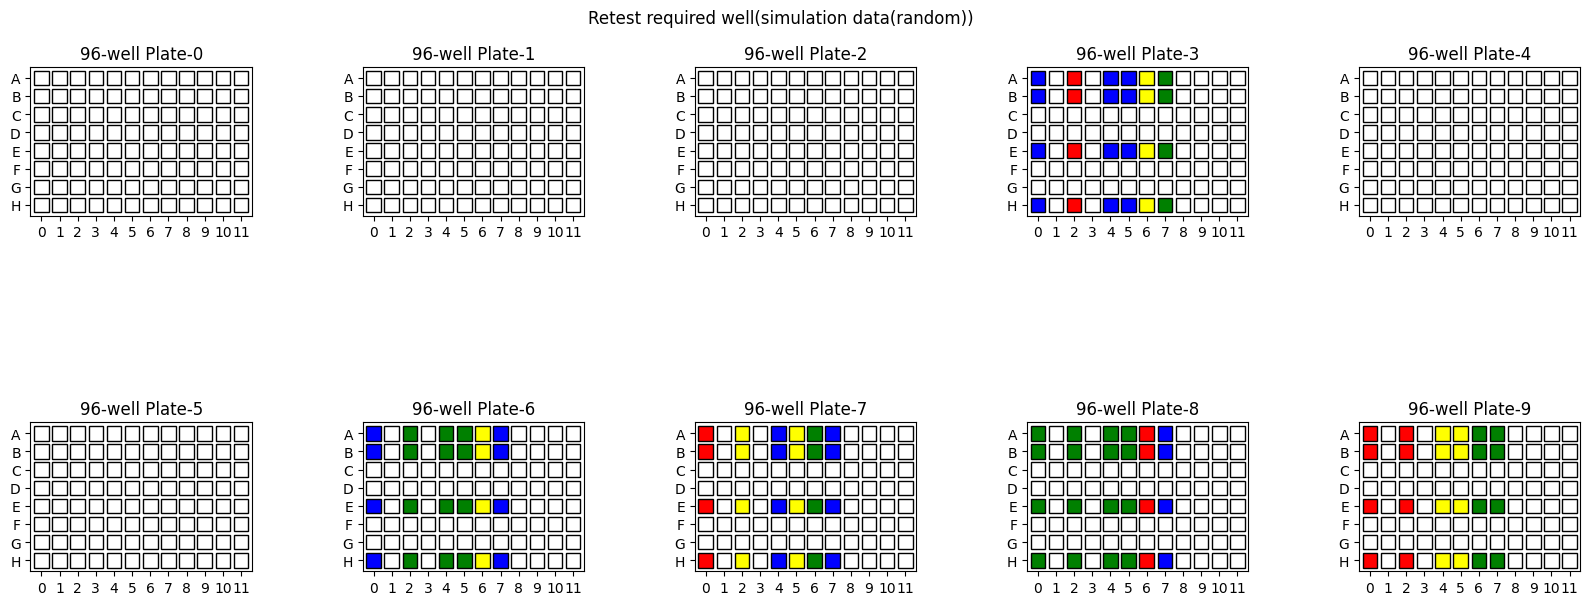

In [11]:
mode = 'simulation data(random)'
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = color_list[re_test_dict[cnt]]
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)